We have chosen Mobile Price Classification dataset from the Kaggle website. This Dataset contains 2000 rows and 21 collumns, we have chosen to use the Train data for our classification. The dataset itself does not contain any null values , hence we have randomly assigned missing values throughout the dataset and further used different startegies to fix the missing values in the dataset.
Dataset link : https://www.kaggle.com/iabhishekofficial/mobile-price-classification

The goal of the project is to classify the mobiles to different price ranges ( 0, 1 , 2, 3)

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [2]:
Data_train = pd.read_csv("C:/Users/gowri/Desktop/MachineLearning/MobileDatatrain.csv")

In [3]:
Data_train.shape # The dataset contains 2000 rows and 21 columns

(2000, 21)

In [4]:
Data_train.describe()

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,...,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
count,1958.000000,2000.0000,1989.000000,2000.000000,2000.000000,1990.000000,1978.000000,1989.000000,1980.000000,2000.000000,...,1983.000000,1987.000000,1993.000000,2000.000000,1986.000000,2000.000000,1994.000000,1990.000000,2000.000000,2000.000000
mean,1237.733912,0.4950,1.521518,0.509500,4.309500,0.522111,32.071790,0.500855,140.152020,4.520500,...,645.298033,1252.344741,2123.308078,12.306500,5.780967,11.011000,0.760782,0.502513,0.507000,1.500000
std,442.248020,0.5001,0.816418,0.500035,4.341444,0.499636,18.227137,0.288398,35.445816,2.287837,...,444.727235,432.878178,1086.380656,4.213245,4.359518,5.463955,0.426713,0.500119,0.500076,1.118314
min,501.000000,0.0000,0.500000,0.000000,0.000000,0.000000,2.000000,0.100000,80.000000,1.000000,...,0.000000,500.000000,256.000000,5.000000,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000
25%,844.500000,0.0000,0.700000,0.000000,1.000000,0.000000,16.000000,0.200000,109.000000,3.000000,...,282.000000,874.500000,1205.000000,9.000000,2.000000,6.000000,1.000000,0.000000,0.000000,0.750000
50%,1224.500000,0.0000,1.500000,1.000000,3.000000,1.000000,32.000000,0.500000,140.000000,4.000000,...,562.000000,1248.000000,2146.000000,12.000000,5.000000,11.000000,1.000000,1.000000,1.000000,1.500000
75%,1619.000000,1.0000,2.200000,1.000000,7.000000,1.000000,48.000000,0.800000,170.000000,7.000000,...,948.000000,1633.500000,3068.000000,16.000000,9.000000,16.000000,1.000000,1.000000,1.000000,2.250000
max,1998.000000,1.0000,3.000000,1.000000,19.000000,1.000000,64.000000,1.000000,200.000000,8.000000,...,1960.000000,1998.000000,3998.000000,19.000000,18.000000,20.000000,1.000000,1.000000,1.000000,3.000000


In [5]:
Data_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 21 columns):
battery_power    1958 non-null float64
blue             2000 non-null int64
clock_speed      1989 non-null float64
dual_sim         2000 non-null int64
fc               2000 non-null int64
four_g           1990 non-null float64
int_memory       1978 non-null float64
m_dep            1989 non-null float64
mobile_wt        1980 non-null float64
n_cores          2000 non-null int64
pc               2000 non-null int64
px_height        1983 non-null float64
px_width         1987 non-null float64
ram              1993 non-null float64
sc_h             2000 non-null int64
sc_w             1986 non-null float64
talk_time        2000 non-null int64
three_g          1994 non-null float64
touch_screen     1990 non-null float64
wifi             2000 non-null int64
price_range      2000 non-null int64
dtypes: float64(12), int64(9)
memory usage: 328.2 KB


In [6]:
#converting price_range to categorical variable
Data_train['price_range'] = Data_train['price_range'].astype(object)

In [7]:
Data_train.isna().sum() #total number of missing data in the dataset

battery_power    42
blue              0
clock_speed      11
dual_sim          0
fc                0
four_g           10
int_memory       22
m_dep            11
mobile_wt        20
n_cores           0
pc                0
px_height        17
px_width         13
ram               7
sc_h              0
sc_w             14
talk_time         0
three_g           6
touch_screen     10
wifi              0
price_range       0
dtype: int64

There are a number of missing values, the columns with missing values are :

In [8]:
Data_train.isna().sum()[Data_train.isna().sum()>0]

battery_power    42
clock_speed      11
four_g           10
int_memory       22
m_dep            11
mobile_wt        20
px_height        17
px_width         13
ram               7
sc_w             14
three_g           6
touch_screen     10
dtype: int64

In [9]:
#Replace NaN values in Battery Power column with the mean of their price range
price_range_battery=Data_train.groupby('price_range')['battery_power'].mean()

Data_P0=Data_train[Data_train['price_range']==0]
Data_P1=Data_train[Data_train['price_range']==1]
Data_P2=Data_train[Data_train['price_range']==2]
Data_P3=Data_train[Data_train['price_range']==3]

Data_P0['battery_power']=Data_P0['battery_power'].fillna(price_range_battery[0])
Data_P1['battery_power']=Data_P1['battery_power'].fillna(price_range_battery[1])
Data_P2['battery_power']=Data_P2['battery_power'].fillna(price_range_battery[2])
Data_P3['battery_power']=Data_P3['battery_power'].fillna(price_range_battery[3])

C:\Users\gowri\Anaconda3\lib\site-packages\ipykernel_launcher.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':
C:\Users\gowri\Anaconda3\lib\site-packages\ipykernel_launcher.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  # Remove the CWD from sys.path while we load stuff.
C:\Users\gowri\Anaconda3\lib\site-packages\ipykernel_launcher.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in t

In [10]:
Data_train = pd.concat([Data_P0, Data_P1, Data_P2, Data_P3]).sort_index()

In [11]:
Data_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2000 entries, 0 to 1999
Data columns (total 21 columns):
battery_power    2000 non-null float64
blue             2000 non-null int64
clock_speed      1989 non-null float64
dual_sim         2000 non-null int64
fc               2000 non-null int64
four_g           1990 non-null float64
int_memory       1978 non-null float64
m_dep            1989 non-null float64
mobile_wt        1980 non-null float64
n_cores          2000 non-null int64
pc               2000 non-null int64
px_height        1983 non-null float64
px_width         1987 non-null float64
ram              1993 non-null float64
sc_h             2000 non-null int64
sc_w             1986 non-null float64
talk_time        2000 non-null int64
three_g          1994 non-null float64
touch_screen     1990 non-null float64
wifi             2000 non-null int64
price_range      2000 non-null object
dtypes: float64(12), int64(8), object(1)
memory usage: 343.8+ KB


 Here use to strategy to compute the mean of every column with respective to each price_range and then replace the NA values with the corresponding mean value 

In [12]:
# Treating null values for clock_speed column, replaced the null values with the respective price_rage mean

price_range_clockspeed=Data_train.groupby('price_range')['clock_speed'].mean()

Data_P0=Data_train[Data_train['price_range']==0]
Data_P1=Data_train[Data_train['price_range']==1]
Data_P2=Data_train[Data_train['price_range']==2]
Data_P3=Data_train[Data_train['price_range']==3]

Data_P0['clock_speed']=Data_P0['clock_speed'].fillna(price_range_clockspeed[0])
Data_P1['clock_speed']=Data_P1['clock_speed'].fillna(price_range_clockspeed[1])
Data_P2['clock_speed']=Data_P2['clock_speed'].fillna(price_range_clockspeed[2])
Data_P3['clock_speed']=Data_P3['clock_speed'].fillna(price_range_clockspeed[3])

Data_train = pd.concat([Data_P0, Data_P1, Data_P2, Data_P3]).sort_index()




C:\Users\gowri\Anaconda3\lib\site-packages\ipykernel_launcher.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  # Remove the CWD from sys.path while we load stuff.
C:\Users\gowri\Anaconda3\lib\site-packages\ipykernel_launcher.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  # This is added back by InteractiveShellApp.init_path()
C:\Users\gowri\Anaconda3\lib\site-packages\ipykernel_launcher.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value

In [13]:
#int_memory
price_range_int_memory=Data_train.groupby('price_range')['int_memory'].mean()

Data_P0=Data_train[Data_train['price_range']==0]
Data_P1=Data_train[Data_train['price_range']==1]
Data_P2=Data_train[Data_train['price_range']==2]
Data_P3=Data_train[Data_train['price_range']==3]

Data_P0['int_memory']=Data_P0['int_memory'].fillna(price_range_int_memory[0])
Data_P1['int_memory']=Data_P1['int_memory'].fillna(price_range_int_memory[1])
Data_P2['int_memory']=Data_P2['int_memory'].fillna(price_range_int_memory[2])
Data_P3['int_memory']=Data_P3['int_memory'].fillna(price_range_int_memory[3])

Data_train = pd.concat([Data_P0, Data_P1, Data_P2, Data_P3]).sort_index()




C:\Users\gowri\Anaconda3\lib\site-packages\ipykernel_launcher.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':
C:\Users\gowri\Anaconda3\lib\site-packages\ipykernel_launcher.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  # Remove the CWD from sys.path while we load stuff.
C:\Users\gowri\Anaconda3\lib\site-packages\ipykernel_launcher.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in t

In [14]:
Data_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2000 entries, 0 to 1999
Data columns (total 21 columns):
battery_power    2000 non-null float64
blue             2000 non-null int64
clock_speed      2000 non-null float64
dual_sim         2000 non-null int64
fc               2000 non-null int64
four_g           1990 non-null float64
int_memory       2000 non-null float64
m_dep            1989 non-null float64
mobile_wt        1980 non-null float64
n_cores          2000 non-null int64
pc               2000 non-null int64
px_height        1983 non-null float64
px_width         1987 non-null float64
ram              1993 non-null float64
sc_h             2000 non-null int64
sc_w             1986 non-null float64
talk_time        2000 non-null int64
three_g          1994 non-null float64
touch_screen     1990 non-null float64
wifi             2000 non-null int64
price_range      2000 non-null object
dtypes: float64(12), int64(8), object(1)
memory usage: 343.8+ KB


In [15]:
#m_dep

price_range_m_dep=Data_train.groupby('price_range')['m_dep'].mean()

Data_P0=Data_train[Data_train['price_range']==0]
Data_P1=Data_train[Data_train['price_range']==1]
Data_P2=Data_train[Data_train['price_range']==2]
Data_P3=Data_train[Data_train['price_range']==3]

Data_P0['m_dep']=Data_P0['m_dep'].fillna(price_range_m_dep[0])
Data_P1['m_dep']=Data_P1['m_dep'].fillna(price_range_m_dep[1])
Data_P2['m_dep']=Data_P2['m_dep'].fillna(price_range_m_dep[2])
Data_P3['m_dep']=Data_P3['m_dep'].fillna(price_range_m_dep[3])

Data_train = pd.concat([Data_P0, Data_P1, Data_P2, Data_P3]).sort_index()

C:\Users\gowri\Anaconda3\lib\site-packages\ipykernel_launcher.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  # Remove the CWD from sys.path while we load stuff.
C:\Users\gowri\Anaconda3\lib\site-packages\ipykernel_launcher.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  # This is added back by InteractiveShellApp.init_path()
C:\Users\gowri\Anaconda3\lib\site-packages\ipykernel_launcher.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value

In [16]:
#mobile_wt
price_range_mobile_wt=Data_train.groupby('price_range')['mobile_wt'].mean()

Data_P0=Data_train[Data_train['price_range']==0]
Data_P1=Data_train[Data_train['price_range']==1]
Data_P2=Data_train[Data_train['price_range']==2]
Data_P3=Data_train[Data_train['price_range']==3]

Data_P0['mobile_wt']=Data_P0['mobile_wt'].fillna(price_range_mobile_wt[0])
Data_P1['mobile_wt']=Data_P1['mobile_wt'].fillna(price_range_mobile_wt[1])
Data_P2['mobile_wt']=Data_P2['mobile_wt'].fillna(price_range_mobile_wt[2])
Data_P3['mobile_wt']=Data_P3['mobile_wt'].fillna(price_range_mobile_wt[3])

Data_train = pd.concat([Data_P0, Data_P1, Data_P2, Data_P3]).sort_index()

C:\Users\gowri\Anaconda3\lib\site-packages\ipykernel_launcher.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':
C:\Users\gowri\Anaconda3\lib\site-packages\ipykernel_launcher.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  # Remove the CWD from sys.path while we load stuff.
C:\Users\gowri\Anaconda3\lib\site-packages\ipykernel_launcher.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in t

In [17]:
#px_height
price_range_px_height=Data_train.groupby('price_range')['px_height'].mean()

Data_P0=Data_train[Data_train['price_range']==0]
Data_P1=Data_train[Data_train['price_range']==1]
Data_P2=Data_train[Data_train['price_range']==2]
Data_P3=Data_train[Data_train['price_range']==3]

Data_P0['px_height']=Data_P0['px_height'].fillna(price_range_px_height[0])
Data_P1['px_height']=Data_P1['px_height'].fillna(price_range_px_height[1])
Data_P2['px_height']=Data_P2['px_height'].fillna(price_range_px_height[2])
Data_P3['px_height']=Data_P3['px_height'].fillna(price_range_px_height[3])

Data_train = pd.concat([Data_P0, Data_P1, Data_P2, Data_P3]).sort_index()

C:\Users\gowri\Anaconda3\lib\site-packages\ipykernel_launcher.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':
C:\Users\gowri\Anaconda3\lib\site-packages\ipykernel_launcher.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  # Remove the CWD from sys.path while we load stuff.
C:\Users\gowri\Anaconda3\lib\site-packages\ipykernel_launcher.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in t

In [18]:
#px_width
price_range_px_width=Data_train.groupby('price_range')['px_width'].mean()

Data_P0=Data_train[Data_train['price_range']==0]
Data_P1=Data_train[Data_train['price_range']==1]
Data_P2=Data_train[Data_train['price_range']==2]
Data_P3=Data_train[Data_train['price_range']==3]

Data_P0['px_width']=Data_P0['px_width'].fillna(price_range_px_width[0])
Data_P1['px_width']=Data_P1['px_width'].fillna(price_range_px_width[1])
Data_P2['px_width']=Data_P2['px_width'].fillna(price_range_px_width[2])
Data_P3['px_width']=Data_P3['px_width'].fillna(price_range_px_width[3])

Data_train = pd.concat([Data_P0, Data_P1, Data_P2, Data_P3]).sort_index()

C:\Users\gowri\Anaconda3\lib\site-packages\ipykernel_launcher.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':
C:\Users\gowri\Anaconda3\lib\site-packages\ipykernel_launcher.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  # Remove the CWD from sys.path while we load stuff.
C:\Users\gowri\Anaconda3\lib\site-packages\ipykernel_launcher.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in t

In [19]:
#ram
price_range_ram=Data_train.groupby('price_range')['ram'].mean()

Data_P0=Data_train[Data_train['price_range']==0]
Data_P1=Data_train[Data_train['price_range']==1]
Data_P2=Data_train[Data_train['price_range']==2]
Data_P3=Data_train[Data_train['price_range']==3]

Data_P0['ram']=Data_P0['ram'].fillna(price_range_ram[0])
Data_P1['ram']=Data_P1['ram'].fillna(price_range_ram[1])
Data_P2['ram']=Data_P2['ram'].fillna(price_range_ram[2])
Data_P3['ram']=Data_P3['ram'].fillna(price_range_ram[3])

Data_train = pd.concat([Data_P0, Data_P1, Data_P2, Data_P3]).sort_index()

C:\Users\gowri\Anaconda3\lib\site-packages\ipykernel_launcher.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':
C:\Users\gowri\Anaconda3\lib\site-packages\ipykernel_launcher.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  # Remove the CWD from sys.path while we load stuff.
C:\Users\gowri\Anaconda3\lib\site-packages\ipykernel_launcher.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in t

In [20]:
#sc_w

price_range_sc_w=Data_train.groupby('price_range')['sc_w'].mean()

Data_P0=Data_train[Data_train['price_range']==0]
Data_P1=Data_train[Data_train['price_range']==1]
Data_P2=Data_train[Data_train['price_range']==2]
Data_P3=Data_train[Data_train['price_range']==3]

Data_P0['sc_w']=Data_P0['sc_w'].fillna(price_range_sc_w[0])
Data_P1['sc_w']=Data_P1['sc_w'].fillna(price_range_sc_w[1])
Data_P2['sc_w']=Data_P2['sc_w'].fillna(price_range_sc_w[2])
Data_P3['sc_w']=Data_P3['sc_w'].fillna(price_range_sc_w[3])

Data_train = pd.concat([Data_P0, Data_P1, Data_P2, Data_P3]).sort_index()

C:\Users\gowri\Anaconda3\lib\site-packages\ipykernel_launcher.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  # Remove the CWD from sys.path while we load stuff.
C:\Users\gowri\Anaconda3\lib\site-packages\ipykernel_launcher.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  # This is added back by InteractiveShellApp.init_path()
C:\Users\gowri\Anaconda3\lib\site-packages\ipykernel_launcher.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value

In [21]:
Data_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2000 entries, 0 to 1999
Data columns (total 21 columns):
battery_power    2000 non-null float64
blue             2000 non-null int64
clock_speed      2000 non-null float64
dual_sim         2000 non-null int64
fc               2000 non-null int64
four_g           1990 non-null float64
int_memory       2000 non-null float64
m_dep            2000 non-null float64
mobile_wt        2000 non-null float64
n_cores          2000 non-null int64
pc               2000 non-null int64
px_height        2000 non-null float64
px_width         2000 non-null float64
ram              2000 non-null float64
sc_h             2000 non-null int64
sc_w             2000 non-null float64
talk_time        2000 non-null int64
three_g          1994 non-null float64
touch_screen     1990 non-null float64
wifi             2000 non-null int64
price_range      2000 non-null object
dtypes: float64(12), int64(8), object(1)
memory usage: 343.8+ KB


In [22]:
# Now that we have handled missing values for the numerical columns, lets impute the the values in the similar way for the categorical columns
#As we can see each of the categorical columns have the data type as int, lets convert them to object data type
Data_train['dual_sim'] = Data_train['dual_sim'].astype(object)
Data_train['four_g'] = Data_train['four_g'].astype(object)
Data_train['three_g'] = Data_train['three_g'].astype(object)
Data_train['touch_screen'] = Data_train['touch_screen'].astype(object)
Data_train['wifi'] = Data_train['wifi'].astype(object)


In [23]:
Data_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2000 entries, 0 to 1999
Data columns (total 21 columns):
battery_power    2000 non-null float64
blue             2000 non-null int64
clock_speed      2000 non-null float64
dual_sim         2000 non-null object
fc               2000 non-null int64
four_g           1990 non-null object
int_memory       2000 non-null float64
m_dep            2000 non-null float64
mobile_wt        2000 non-null float64
n_cores          2000 non-null int64
pc               2000 non-null int64
px_height        2000 non-null float64
px_width         2000 non-null float64
ram              2000 non-null float64
sc_h             2000 non-null int64
sc_w             2000 non-null float64
talk_time        2000 non-null int64
three_g          1994 non-null object
touch_screen     1990 non-null object
wifi             2000 non-null object
price_range      2000 non-null object
dtypes: float64(9), int64(6), object(6)
memory usage: 343.8+ KB


In [26]:
# lets follow the same strategy, but this time lets impute the rows with the mode of the values with respective to each price range
#Note : We are not finding the mean/mode of the column itself, instead we are grouping the NA values with respect to each price range and then find the mean/mode for that price range


In [27]:
#four_g
mode_fourg_P0=Data_train[Data_train.price_range==0]['four_g'].mode()
mode_fourg_P0[0]

mode_fourg_P1=Data_train[Data_train.price_range==1]['four_g'].mode()
mode_fourg_P1[0]

mode_fourg_P2=Data_train[Data_train.price_range==2]['four_g'].mode()
mode_fourg_P2[0]

mode_fourg_P3=Data_train[Data_train.price_range==3]['four_g'].mode()
mode_fourg_P3[0]



1.0

In [28]:
Data_P0['four_g']=Data_P0['four_g'].fillna(mode_fourg_P0[0])
Data_P1['four_g']=Data_P1['four_g'].fillna(mode_fourg_P1[0])
Data_P2['four_g']=Data_P2['four_g'].fillna(mode_fourg_P2[0])
Data_P3['four_g']=Data_P3['four_g'].fillna(mode_fourg_P3[0])

In [29]:
Data_train = pd.concat([Data_P0, Data_P1, Data_P2, Data_P3]).sort_index()

In [30]:
Data_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2000 entries, 0 to 1999
Data columns (total 21 columns):
battery_power    2000 non-null float64
blue             2000 non-null int64
clock_speed      2000 non-null float64
dual_sim         2000 non-null int64
fc               2000 non-null int64
four_g           2000 non-null float64
int_memory       2000 non-null float64
m_dep            2000 non-null float64
mobile_wt        2000 non-null float64
n_cores          2000 non-null int64
pc               2000 non-null int64
px_height        2000 non-null float64
px_width         2000 non-null float64
ram              2000 non-null float64
sc_h             2000 non-null int64
sc_w             2000 non-null float64
talk_time        2000 non-null int64
three_g          1994 non-null float64
touch_screen     1990 non-null float64
wifi             2000 non-null int64
price_range      2000 non-null object
dtypes: float64(12), int64(8), object(1)
memory usage: 343.8+ KB


In [31]:
#three_g
mode_threeg_P0=Data_train[Data_train.price_range==0]['three_g'].mode()
mode_fourg_P0[0]

mode_threeg_P1=Data_train[Data_train.price_range==1]['three_g'].mode()
mode_threeg_P1[0]

mode_threeg_P2=Data_train[Data_train.price_range==2]['three_g'].mode()
mode_threeg_P2[0]

mode_threeg_P3=Data_train[Data_train.price_range==3]['three_g'].mode()
mode_threeg_P3[0]

Data_P0['three_g']=Data_P0['three_g'].fillna(mode_threeg_P0[0])
Data_P1['three_g']=Data_P1['three_g'].fillna(mode_threeg_P1[0])
Data_P2['three_g']=Data_P2['three_g'].fillna(mode_threeg_P2[0])
Data_P3['three_g']=Data_P3['three_g'].fillna(mode_threeg_P3[0])

Data_train = pd.concat([Data_P0, Data_P1, Data_P2, Data_P3]).sort_index()


In [32]:
#Touch screen

mode_tc_P0=Data_train[Data_train.price_range==0]['touch_screen'].mode()
mode_tc_P0[0]

mode_tc_P1=Data_train[Data_train.price_range==1]['touch_screen'].mode()
mode_tc_P1[0]

mode_tc_P2=Data_train[Data_train.price_range==2]['touch_screen'].mode()
mode_tc_P2[0]

mode_tc_P3=Data_train[Data_train.price_range==3]['touch_screen'].mode()
mode_tc_P3[0]

Data_P0['touch_screen']=Data_P0['touch_screen'].fillna(mode_tc_P0[0])
Data_P1['touch_screen']=Data_P1['touch_screen'].fillna(mode_tc_P1[0])
Data_P2['touch_screen']=Data_P2['touch_screen'].fillna(mode_tc_P2[0])
Data_P3['touch_screen']=Data_P3['touch_screen'].fillna(mode_tc_P3[0])

Data_train = pd.concat([Data_P0, Data_P1, Data_P2, Data_P3]).sort_index()

In [33]:
Data_train['dual_sim'] = Data_train['dual_sim'].astype(object)
Data_train['four_g'] = Data_train['four_g'].astype(object)
Data_train['three_g'] = Data_train['three_g'].astype(object)
Data_train['touch_screen'] = Data_train['touch_screen'].astype(object)
Data_train['wifi'] = Data_train['wifi'].astype(object)


In [34]:
Data_train.info()
# we can be sure that there are no more missing values

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2000 entries, 0 to 1999
Data columns (total 21 columns):
battery_power    2000 non-null float64
blue             2000 non-null int64
clock_speed      2000 non-null float64
dual_sim         2000 non-null object
fc               2000 non-null int64
four_g           2000 non-null object
int_memory       2000 non-null float64
m_dep            2000 non-null float64
mobile_wt        2000 non-null float64
n_cores          2000 non-null int64
pc               2000 non-null int64
px_height        2000 non-null float64
px_width         2000 non-null float64
ram              2000 non-null float64
sc_h             2000 non-null int64
sc_w             2000 non-null float64
talk_time        2000 non-null int64
three_g          2000 non-null object
touch_screen     2000 non-null object
wifi             2000 non-null object
price_range      2000 non-null object
dtypes: float64(9), int64(6), object(6)
memory usage: 343.8+ KB


# Data Exploration

In [35]:
Data_train['price_range'].unique()
# The price_range is for 0,1,2,3 

array([1, 2, 3, 0], dtype=object)

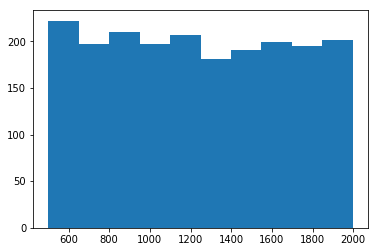

In [36]:
plt.hist(Data_train['battery_power'])
plt.show() # we observe that low power batteries are slightly more in number

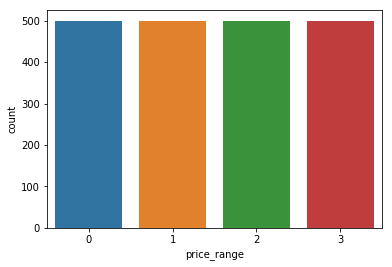

In [37]:
sns.countplot(Data_train['price_range'])
plt.show()   # The data has approximately the same amount of  price_range across the dataset

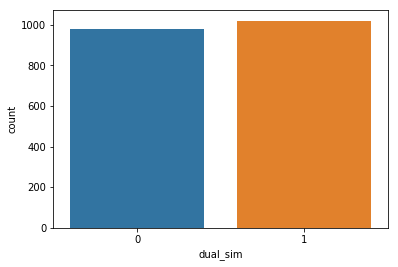

In [38]:
sns.countplot(Data_train['dual_sim'])
plt.show() # there are more number phones with dual sim than those without it.

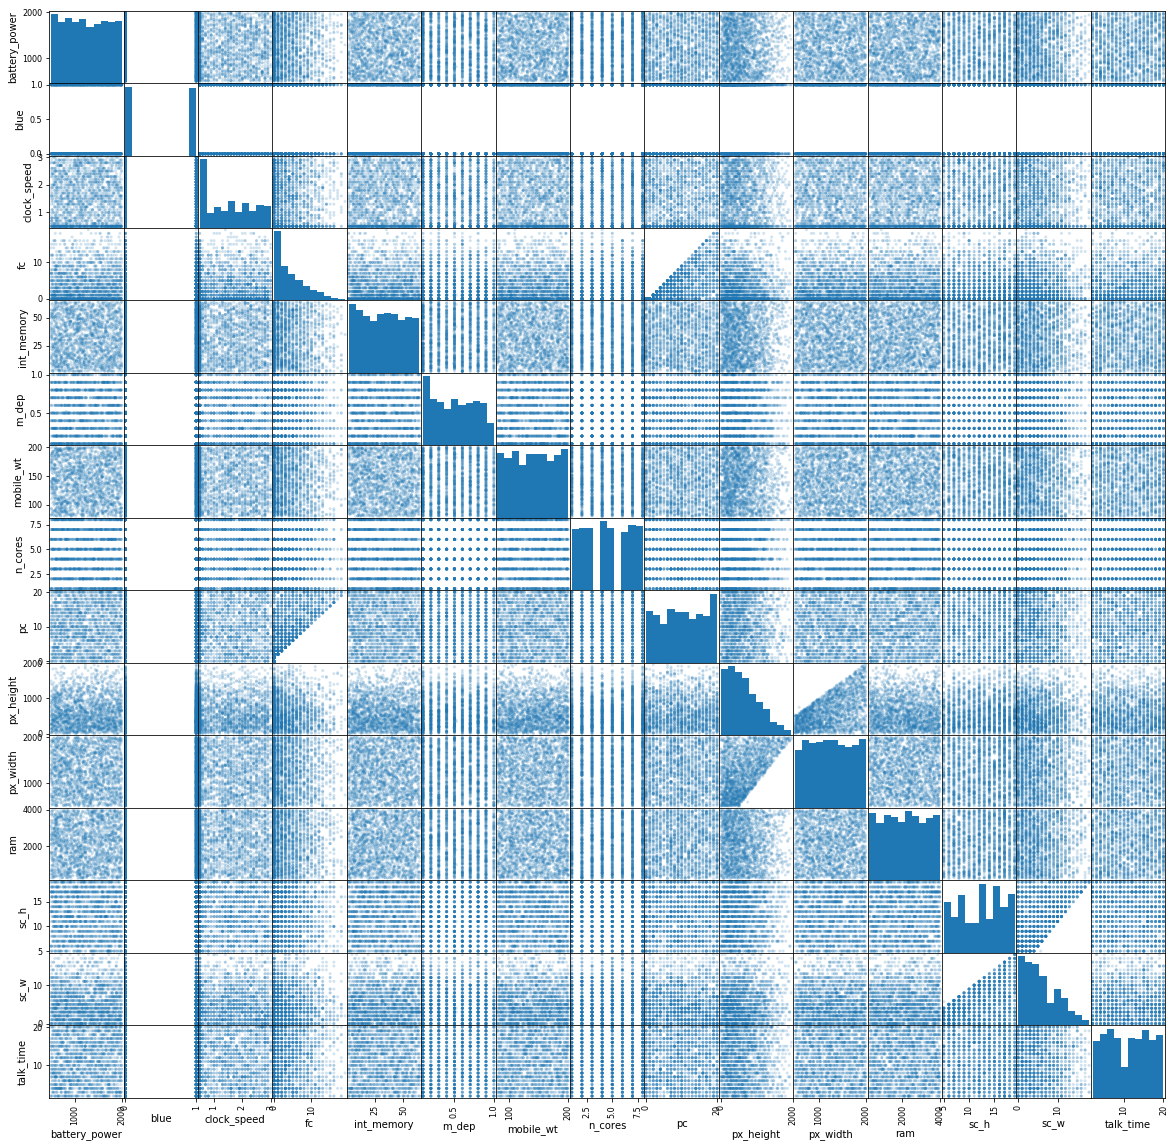

In [39]:
pd.plotting.scatter_matrix(Data_train, alpha = '0.2', figsize = (20,20))
plt.show()

In [40]:
# As we can see above , some of the data such as clock_speed , fc , m_dep , px_height and sc_w are positively skewed 

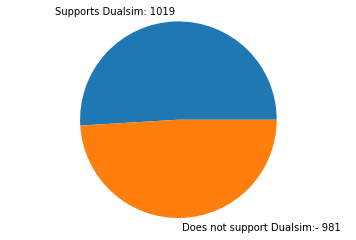

In [41]:
x=Data_train['dual_sim'].value_counts()
labels='Supports Dualsim: '+str(x[1]),'Does not support Dualsim:- '+str(x[0])
sizes=[x[1],x[0]]
fig1, ax1 = plt.subplots()
ax1.pie(sizes,labels=labels)
ax1.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.show()



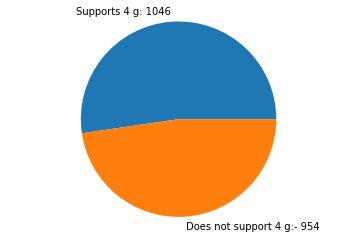

In [42]:
x=Data_train['four_g'].value_counts()
labels='Supports 4 g: '+str(x[1]),'Does not support 4 g:- '+str(x[0])
sizes=[x[1],x[0]]
fig1, ax1 = plt.subplots()
ax1.pie(sizes,labels=labels)
ax1.axis('equal') 
plt.show()

# Phones with 4g support are high in number

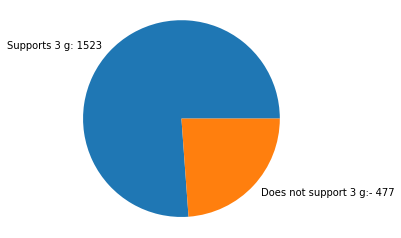

In [43]:
#pie chart representation
x=Data_train['three_g'].value_counts()
labels='Supports 3 g: '+str(x[1]),'Does not support 3 g:- '+str(x[0])
sizes=[x[1],x[0]]
fig1, ax1 = plt.subplots()
ax1.pie(sizes,labels=labels)
ax1.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.show()

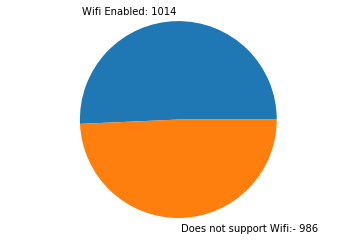

In [44]:
x=Data_train['wifi'].value_counts()
labels='Wifi Enabled: '+str(x[1]),'Does not support Wifi:- '+str(x[0])
sizes=[x[1],x[0]]
fig1, ax1 = plt.subplots()
ax1.pie(sizes,labels=labels)
ax1.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.show()

#1014 phones are wifi enabled and 986 does not support wifi

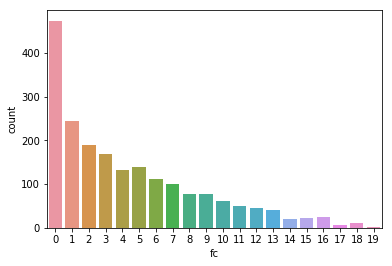

In [45]:
sns.countplot(x='fc', data=Data_train)
plt.show()

#most of the phones are have front camera = 0


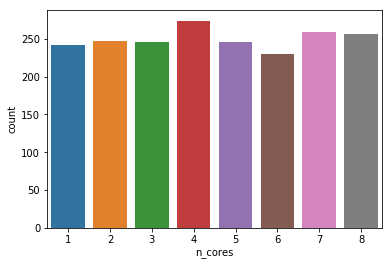

In [46]:
sns.countplot(x='n_cores', data=Data_train)
plt.show()

# the cores are almost equally distributed and there is less variation

In [47]:
# Lets observe how some of feautures are distributed with respect to price range : Bivariant Analysis
Data_train['price_range'] = Data_train['price_range'].astype(int)

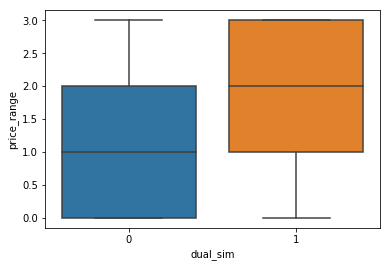

In [48]:
sns.boxplot(x='dual_sim',y='price_range',data=Data_train)
plt.show()

#phone that supports dula sim are more costlier than others 

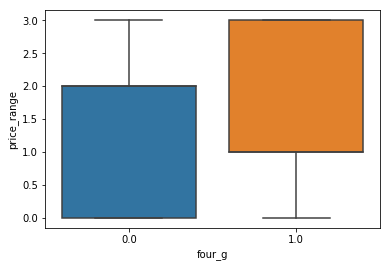

In [49]:
sns.boxplot(x='four_g',y='price_range',data=Data_train)
plt.show()

#mobile prices with 4g are costlier than other phones and same applies to three_g

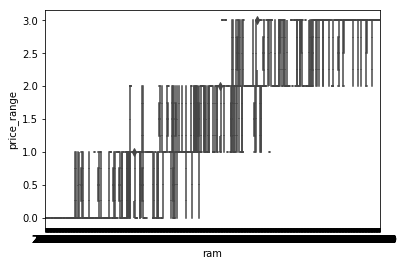

In [50]:
sns.boxplot(x='ram',y='price_range',data=Data_train)

# here we can see that the price increases as the ram size increases

C:\Users\gowri\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


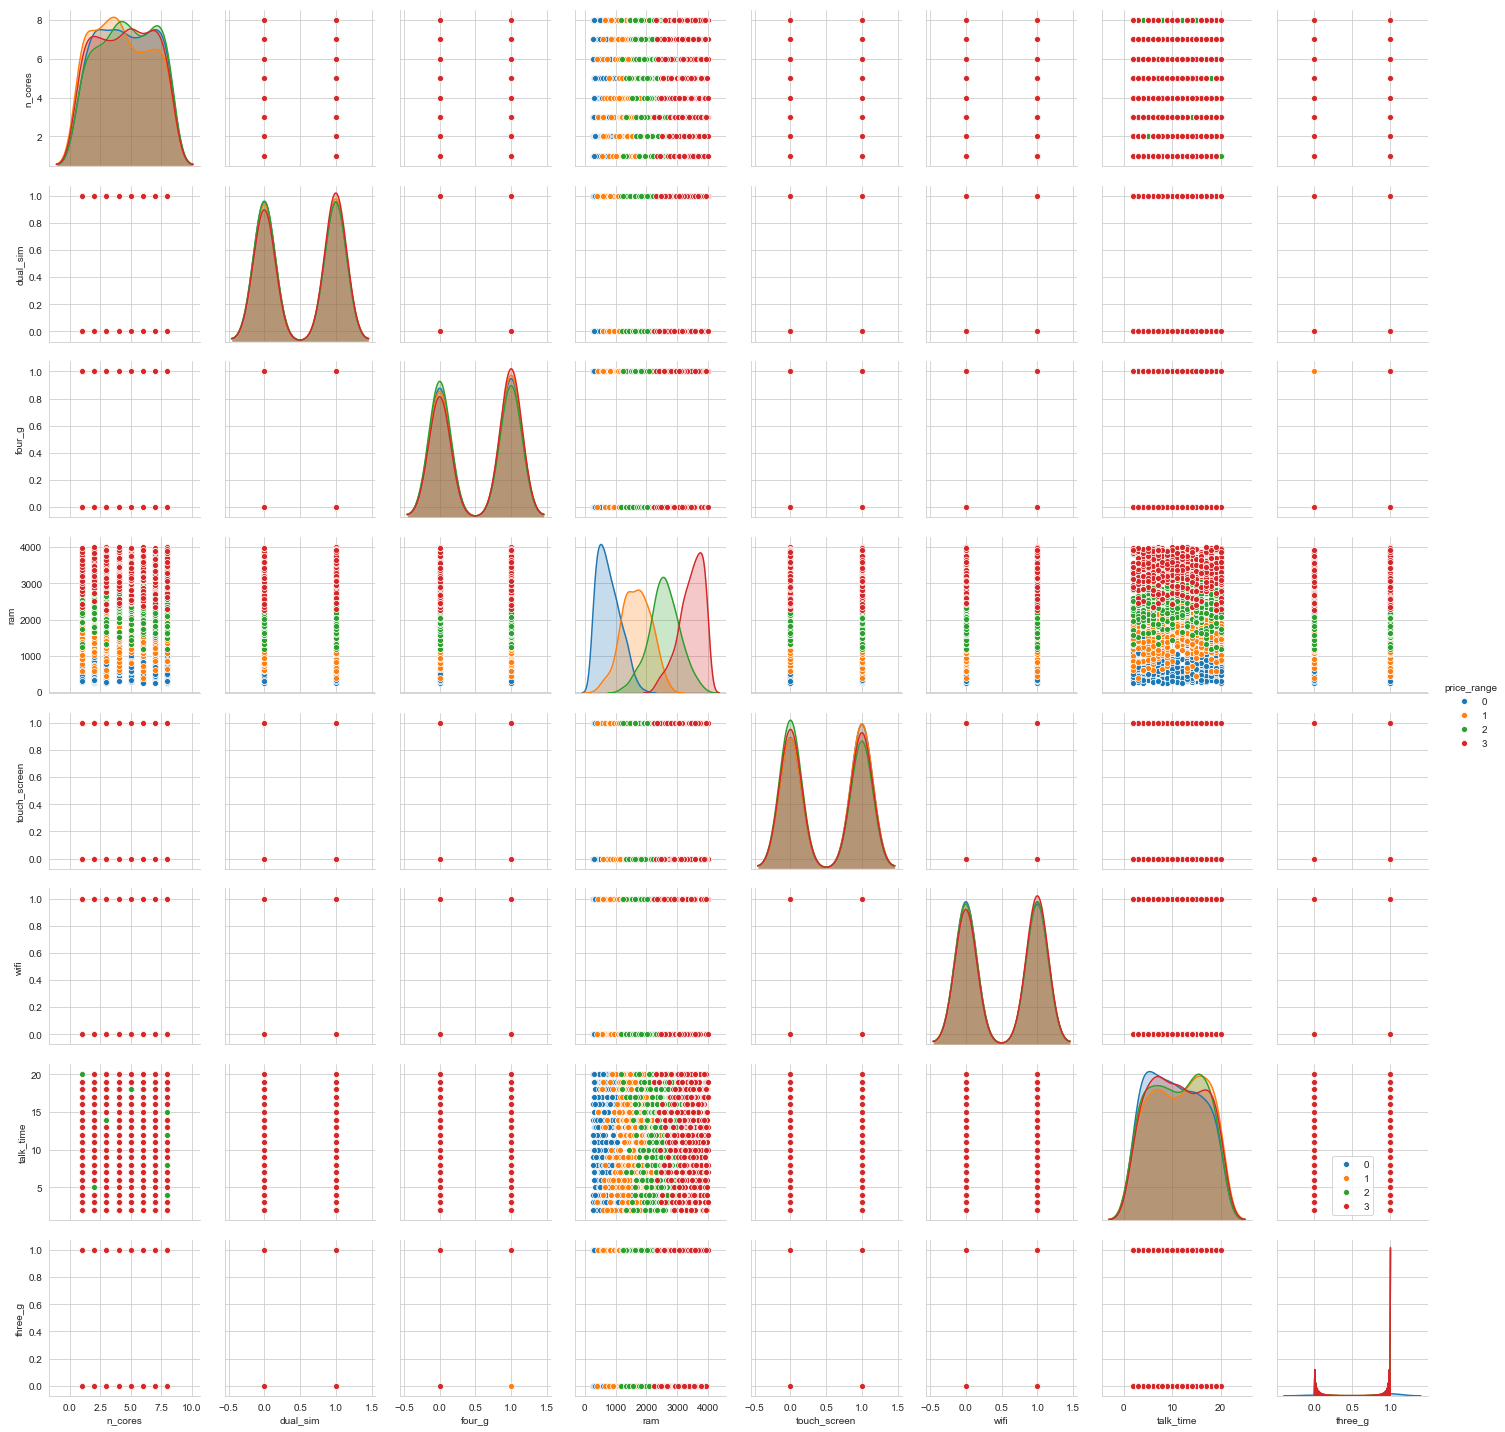

In [51]:
# pairwise scatter plot: Pair-Plot.
sns.set_style("whitegrid");
sns.pairplot(Data_train,hue='price_range',vars=['n_cores', 'dual_sim','four_g', 'ram','touch_screen','wifi','talk_time','three_g'])
plt.legend()
plt.show() 

# Data Modelling 
Now that we have completed the Data preprocessing and the Data Exploration , lets look at the Data Modelling
Here I have modelled using 
1) KNeighbors Classifier
2) Softmax Regression
3) Decison tree Classifier
4) SVC Classifier

# Splitting the Dataset and Scaling

In [52]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split

In [53]:
X=Data_train.drop('price_range',axis=1)
y=Data_train['price_range'].values.astype(int)

In [54]:
# Splitting the dataset and scaling 
X_train_org, X_test_org, y_train, y_test = train_test_split(X, y, random_state = 0,)
scaler = MinMaxScaler()
# we have chozen to use min max scaler to retain the value of 0 , 1 for the categorical values
X_train = scaler.fit_transform(X_train_org)
X_test = scaler.transform(X_test_org)


In [55]:
y_test

array([3, 0, 2, 2, 2, 0, 0, 3, 3, 1, 1, 3, 0, 2, 3, 0, 3, 2, 2, 1, 0, 0,
       3, 1, 2, 2, 3, 1, 3, 1, 1, 0, 2, 0, 1, 3, 0, 0, 3, 3, 3, 1, 3, 3,
       1, 3, 0, 1, 3, 1, 1, 3, 0, 3, 0, 3, 2, 2, 0, 3, 3, 1, 3, 2, 1, 2,
       3, 2, 2, 2, 3, 2, 1, 0, 1, 3, 2, 2, 1, 2, 3, 3, 3, 0, 0, 0, 2, 1,
       2, 3, 1, 2, 2, 1, 0, 3, 3, 3, 0, 3, 1, 1, 2, 1, 3, 2, 2, 3, 2, 3,
       3, 0, 0, 1, 3, 3, 0, 0, 1, 0, 0, 3, 2, 2, 1, 1, 1, 1, 0, 2, 1, 3,
       2, 3, 3, 3, 3, 2, 0, 1, 1, 2, 1, 3, 1, 3, 0, 0, 2, 0, 1, 1, 1, 1,
       3, 0, 0, 3, 1, 3, 2, 1, 3, 1, 2, 3, 3, 2, 1, 0, 3, 1, 2, 3, 3, 0,
       2, 2, 3, 0, 2, 1, 0, 1, 2, 1, 2, 0, 3, 3, 1, 1, 0, 2, 3, 0, 1, 2,
       2, 0, 3, 3, 3, 1, 2, 3, 3, 3, 0, 0, 0, 2, 3, 3, 0, 0, 1, 3, 1, 3,
       3, 3, 0, 0, 2, 3, 3, 1, 0, 2, 0, 0, 0, 3, 2, 0, 2, 2, 1, 1, 0, 2,
       3, 3, 0, 0, 1, 3, 3, 2, 3, 0, 3, 1, 1, 0, 2, 3, 3, 2, 0, 0, 1, 2,
       3, 2, 2, 3, 2, 1, 0, 3, 3, 2, 1, 3, 2, 2, 2, 1, 0, 2, 2, 1, 0, 0,
       2, 2, 2, 2, 0, 1, 3, 0, 1, 2, 3, 0, 2, 0, 1,

In [56]:
len(y_test)

500

# KNeighbor Classifier

In [57]:
#lets model the Kneighbor classifier for values of k from 1 to 35 and then lets choose the best value of K
from sklearn.neighbors import KNeighborsClassifier

train_score_array = []
test_score_array = []

for k in range(1,35):
    knn = KNeighborsClassifier(k)
    knn.fit(X_train, y_train)
    train_score_array.append(knn.score(X_train, y_train))
    test_score_array.append(knn.score(X_test, y_test))
       

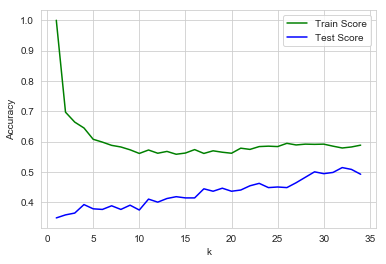

In [58]:
x_axis = range(1,35)
%matplotlib inline
plt.plot(x_axis, train_score_array, label = 'Train Score', c = 'g')
plt.plot(x_axis, test_score_array, label = 'Test Score', c='b')
plt.xlabel('k')
plt.ylabel('Accuracy')
plt.legend()

In [59]:
# lets find the best value of k using the cross validation method using GridCV 

import sklearn.cross_validation 
import sklearn.grid_search
import sklearn.metrics
import sklearn.neighbors


 

C:\Users\gowri\Anaconda3\lib\site-packages\sklearn\cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)
C:\Users\gowri\Anaconda3\lib\site-packages\sklearn\grid_search.py:42: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. This module will be removed in 0.20.
  DeprecationWarning)


In [60]:
from sklearn.model_selection import GridSearchCV
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import cross_val_score

In [61]:
k_range = range(1, 31)
k_scores = []

# 1. we will loop through reasonable values of k
for k in k_range:
    # 2. run KNeighborsClassifier with k neighbours
    knn = KNeighborsClassifier(n_neighbors=k)
    # 3. obtain cross_val_score for KNeighborsClassifier with k neighbours
    scores = cross_val_score(knn, X_train, y_train, cv=10, scoring='accuracy')
    # 4. append mean of scores for k neighbors to k_scores list
    k_scores.append(scores.mean())
print(k_scores)


[0.3852604195822117, 0.34333386989371706, 0.3612899532271504, 0.38129997449336084, 0.3946517999398572, 0.37928195647534285, 0.3846468527730361, 0.3880072711940351, 0.4113953092609922, 0.41139548584541696, 0.4119998077992656, 0.4186711265245422, 0.4206713067127308, 0.42208536195202273, 0.4439748052866414, 0.44266348654534793, 0.43460525933284727, 0.4433617754382677, 0.451993119614125, 0.450686156621976, 0.4506504180966601, 0.4606778623594482, 0.45737113761612624, 0.45869098766751987, 0.45738444191113203, 0.4706911618494355, 0.4686647939107603, 0.46129047377080623, 0.46592629342084874, 0.4725045449467424]


Text(0,0.5,'Cross-Validated Accuracy')

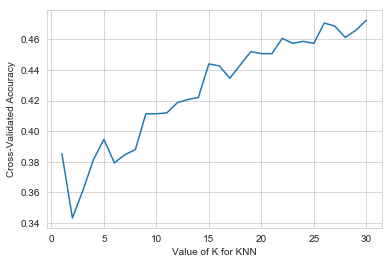

In [62]:
plt.plot(k_range, k_scores)
plt.xlabel('Value of K for KNN')
plt.ylabel('Cross-Validated Accuracy')

If you see here the training score is highest for K =25 , however this may overfit the model, hence a value of K close to 23 would provide a good model 

In [63]:
k_scores[23] #This would give us an accuracy of 0.4557 which would be considered good for the model

0.45869098766751987

In [65]:
#Now that we have obtained the value of K lets build the model and check the confusion matrix
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

knn = KNeighborsClassifier(n_neighbors=23)
knn.fit(X_train, y_train)
predicted_price_train= knn.predict(X_train)
predicted_price_test = knn.predict(X_test)


print("Train Set Accuracy:"+str(accuracy_score(predicted_price_train,y_train)))
print("Test Set Accuracy:"+str(accuracy_score(predicted_price_test,y_test)))

Train Set Accuracy:0.5833333333333334
Test Set Accuracy:0.462


In [67]:
len(y_test)

500

In [70]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import confusion_matrix,classification_report
print("\nConfusion Matrix:\n%s"%confusion_matrix(predicted_price_test,y_test))
print("\nClassification Report:\n%s"%classification_report(predicted_price_test,y_test))


Confusion Matrix:
[[73 45 21  2]
 [40 40 32 15]
 [10 22 48 54]
 [ 1  3 24 70]]

Classification Report:
             precision    recall  f1-score   support

          0       0.59      0.52      0.55       141
          1       0.36      0.31      0.34       127
          2       0.38      0.36      0.37       134
          3       0.50      0.71      0.59        98

avg / total       0.46      0.46      0.46       500



# 2) Softmax classification 

In [71]:
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split

# To form the base model , we have initially chozen the regularization parameter c as 10
softmax_reg = LogisticRegression(multi_class="multinomial",solver="lbfgs", C=10 , max_iter=5000)
softmax_reg.fit(X_train, y_train)


LogisticRegression(C=10, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=5000, multi_class='multinomial',
          n_jobs=1, penalty='l2', random_state=None, solver='lbfgs',
          tol=0.0001, verbose=0, warm_start=False)

In [72]:
y_train_pred = softmax_reg.predict(X_train)
y_test_pred = softmax_reg.predict(X_test)


In [73]:
from sklearn.metrics import accuracy_score
print("Train Set Accuracy:"+str(accuracy_score(y_train_pred,y_train)))
print("Test Set Accuracy:"+str(accuracy_score(y_test_pred,y_test)))

Train Set Accuracy:0.9733333333333334
Test Set Accuracy:0.96


In [ ]:
#In the above model we used the value of c as 10, however we are not sure if this is the ideal hyper parameter. lets tune the hyperparameters.

In [74]:
#lets evaluate the model to find the best value of c

param_grid = {'C':[1, 10, 25, 50, 75, 100]}



In [75]:
grid1 = GridSearchCV(LogisticRegression(multi_class = 'multinomial', solver = 'lbfgs', max_iter = 5000), 
                     param_grid, cv =7 , return_train_score= True, iid = False)

In [76]:
grid1.fit(X_train, y_train)

GridSearchCV(cv=7, error_score='raise',
       estimator=LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=5000, multi_class='multinomial',
          n_jobs=1, penalty='l2', random_state=None, solver='lbfgs',
          tol=0.0001, verbose=0, warm_start=False),
       fit_params=None, iid=False, n_jobs=1,
       param_grid={'C': [1, 10, 25, 50, 75, 100]}, pre_dispatch='2*n_jobs',
       refit=True, return_train_score=True, scoring=None, verbose=0)

In [77]:
print(grid1.best_params_)
print(grid1.best_score_)
print(grid1.scorer_)

{'C': 100}
0.9633446418636676
<function _passthrough_scorer at 0x000001F2557281E0>


In [ ]:
#Again this model using the cross validations folds cv =7 , to be sure if this is giving us the right results lets check the model with different values of cv

In [78]:
from tqdm import tqdm
cv = range(2,10)
train_accuracy_list = []
test_accuracy_list = []

for i in tqdm(cv): 
    
    grid1 = GridSearchCV(LogisticRegression(multi_class = 'multinomial', solver = 'lbfgs', max_iter = 5000), 
                     param_grid, cv =i , return_train_score= True, iid = False)
    grid1.fit(X_train, y_train)
    
    train_accuracy_list.append(grid1.best_score_)
    

100%|████████████████████████████████████████████████████████████████████████████████████| 8/8 [00:57<00:00, 10.83s/it]


In [79]:
train_accuracy_list

[0.9506648011818688,
 0.9499985413274986,
 0.9633507500998231,
 0.9646731926651038,
 0.9606818541784841,
 0.9633446418636676,
 0.9633591628663594,
 0.9620220535979526]

Text(0,0.5,'Cross-Validated train score')

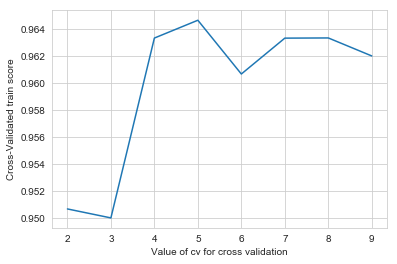

In [80]:
plt.plot(cv, train_accuracy_list)
plt.xlabel('Value of cv for cross validation')
plt.ylabel('Cross-Validated train score')

 we see that the train score gets consistent at cv = 7, 8 ..hence we can choose the value of cv = 7 to get a good model.

#Note that we have obtained the best C value as 100 and to avoid overfitting we need to reduce the C value and hence kets choose a C value of 75

In [81]:
# Lets build the model with C = 50 

softmax_reg = LogisticRegression(multi_class="multinomial",solver="lbfgs", C=75 , max_iter=5000)
softmax_reg.fit(X_train, y_train)


LogisticRegression(C=75, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=5000, multi_class='multinomial',
          n_jobs=1, penalty='l2', random_state=None, solver='lbfgs',
          tol=0.0001, verbose=0, warm_start=False)

In [82]:
y_train_pred = softmax_reg.predict(X_train)
y_test_pred = softmax_reg.predict(X_test)


In [83]:
from sklearn.metrics import accuracy_score
print("Train Set Accuracy:"+str(accuracy_score(y_train_pred,y_train)))
print("Test Set Accuracy:"+str(accuracy_score(y_test_pred,y_test)))

Train Set Accuracy:0.9826666666666667
Test Set Accuracy:0.962


In [84]:
#from sklearn.metrics import confusion_matrix
print("\nConfusion Matrix:\n%s"%confusion_matrix(y_test_pred,y_test))
print("\nClassification Report:\n%s"%classification_report(y_test_pred,y_test))


Confusion Matrix:
[[121   3   0   0]
 [  3 103   3   0]
 [  0   4 118   2]
 [  0   0   4 139]]

Classification Report:
             precision    recall  f1-score   support

          0       0.98      0.98      0.98       124
          1       0.94      0.94      0.94       109
          2       0.94      0.95      0.95       124
          3       0.99      0.97      0.98       143

avg / total       0.96      0.96      0.96       500



# Decision Tree Classifier

In [85]:
%matplotlib notebook
from sklearn.tree import DecisionTreeClassifier
dtree = DecisionTreeClassifier(random_state=0)
dtree.fit(X_train, y_train)
print("Accuracy on training set: {:.3f}".format(dtree.score(X_train, y_train)))
print("Accuracy on test set: {:.3f}".format(dtree.score(X_test, y_test)))

Accuracy on training set: 1.000
Accuracy on test set: 0.808


In [86]:
dtree = DecisionTreeClassifier(max_depth=4, random_state=0)
dtree.fit(X_train, y_train)

print("Accuracy on training set: {:.3f}".format(dtree.score(X_train, y_train)))
print("Accuracy on test set: {:.3f}".format(dtree.score(X_test, y_test)))


Accuracy on training set: 0.834
Accuracy on test set: 0.800


In [ ]:
#y_train_pred = dtree.predict(X_train)
#y_test_pred = dtree.predict(X_test)
#print("\nConfusion Matrix:\n%s"%confusion_matrix(y_test_pred,y_test))
#print("\nClassification Report:\n%s"%classification_report(y_test_pred,y_test))

In [87]:
# lets find the best max_depth value 

param_grid = {'max_depth':[1, 2, 3, 5, 7, 10]}

grid3 = GridSearchCV(DecisionTreeClassifier(random_state = 0), param_grid, cv = 5, 
                    return_train_score= True, iid = False)
grid3.fit(X_train, y_train)
print(grid3.best_params_)
print(grid3.best_score_)
print(grid3.scorer_)

{'max_depth': 10}
0.8333548446834594
<function _passthrough_scorer at 0x000001F2557281E0>


In [88]:
result = pd.DataFrame(grid3.cv_results_)
result.head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_max_depth,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,...,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,0.001832,0.001157,0.000200,0.000400,1,{'max_depth': 1},0.491694,0.490000,0.486667,0.490000,...,0.488662,0.002471,6,0.489575,0.490000,0.489167,0.490000,0.490425,0.489833,0.000428
1,0.004293,0.001666,0.000200,0.000400,2,{'max_depth': 2},0.710963,0.790000,0.723333,0.790000,...,0.752023,0.032961,5,0.778148,0.760000,0.774167,0.759167,0.761865,0.766669,0.007897
2,0.003042,0.001513,0.000000,0.000000,3,{'max_depth': 3},0.720930,0.773333,0.733333,0.790000,...,0.754021,0.025269,4,0.783987,0.771667,0.780000,0.765000,0.773522,0.774835,0.006617
3,0.011588,0.001174,0.000207,0.000414,5,{'max_depth': 5},0.833887,0.813333,0.803333,0.816667,...,0.825350,0.019727,3,0.899917,0.893333,0.889167,0.895000,0.884263,0.892336,0.005306
4,0.013925,0.001549,0.000315,0.000416,7,{'max_depth': 7},0.840532,0.806667,0.836667,0.836667,...,0.832668,0.013212,2,0.969975,0.961667,0.956667,0.966667,0.947544,0.960504,0.007896


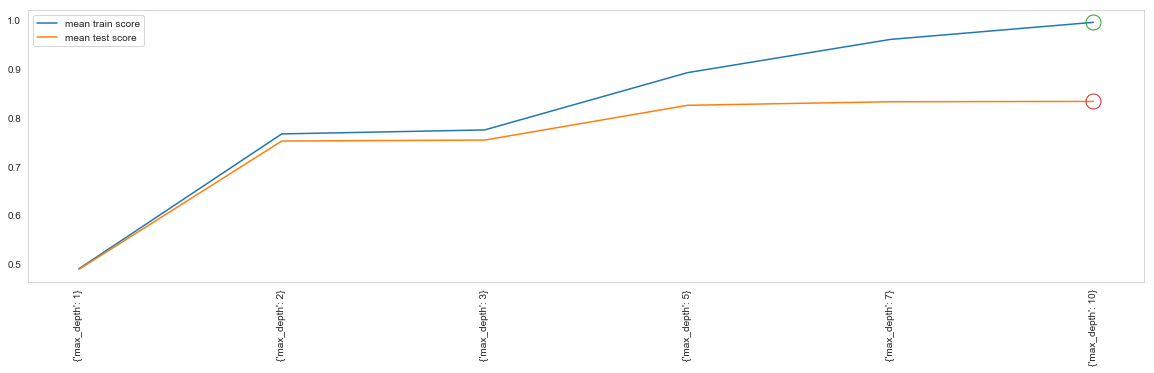

In [89]:
# Now we see that the best value of max_depth = 10
%matplotlib inline

plt.subplots(figsize = (20,5))
plt.plot(range(result['params'].shape[0]), result['mean_train_score'], label = 'mean train score')
plt.plot(range(result['params'].shape[0]), result['mean_test_score'], label = 'mean test score')
plt.xticks(range(result['params'].shape[0]), result['params'], rotation = 90)
plt.plot([grid3.best_index_], result['mean_train_score'][grid3.best_index_], 'o', markersize = 15, fillstyle = 'none')
plt.plot([grid3.best_index_], result['mean_test_score'][grid3.best_index_], 'o', markersize = 15, fillstyle = 'none')
plt.legend()
plt.grid()

In [90]:
train_accuracy_list

[0.9506648011818688,
 0.9499985413274986,
 0.9633507500998231,
 0.9646731926651038,
 0.9606818541784841,
 0.9633446418636676,
 0.9633591628663594,
 0.9620220535979526]

Text(0,0.5,'Cross-Validated train score')

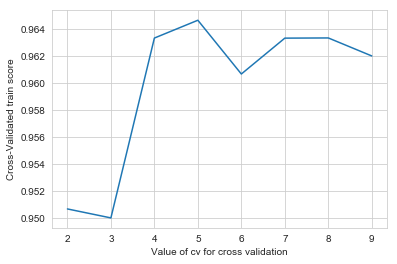

In [91]:
plt.plot(cv, train_accuracy_list)
plt.xlabel('Value of cv for cross validation')
plt.ylabel('Cross-Validated train score')

 here we see that cv value of 7 would give us the highest training score, but that may overfit the model, hence cv= 5 and max_depth = 10 would give us the best results


In [ ]:
#Model Building using Max_depth = 10

In [92]:
dtree = DecisionTreeClassifier(max_depth=10, random_state=0)
dtree.fit(X_train, y_train)

print("Accuracy on training set: {:.3f}".format(dtree.score(X_train, y_train)))
print("Accuracy on test set: {:.3f}".format(dtree.score(X_test, y_test)))


Accuracy on training set: 0.995
Accuracy on test set: 0.820


In [93]:
y_train_pred = dtree.predict(X_train)
y_test_pred = dtree.predict(X_test)
print("\nConfusion Matrix:\n%s"%confusion_matrix(y_test_pred,y_test))
print("\nClassification Report:\n%s"%classification_report(y_test_pred,y_test))


Confusion Matrix:
[[111   7   0   0]
 [ 13  88  16   0]
 [  0  15  90  20]
 [  0   0  19 121]]

Classification Report:
             precision    recall  f1-score   support

          0       0.90      0.94      0.92       118
          1       0.80      0.75      0.78       117
          2       0.72      0.72      0.72       125
          3       0.86      0.86      0.86       140

avg / total       0.82      0.82      0.82       500



# SVM Classifier

In [94]:
# lets build our first model 

from sklearn.svm import SVC
svm=SVC(random_state=1)
svm.fit(X_train,y_train)
print("train accuracy:",svm.score(X_train,y_train))
print("test accuracy:",svm.score(X_test,y_test))

train accuracy: 0.9133333333333333
test accuracy: 0.886


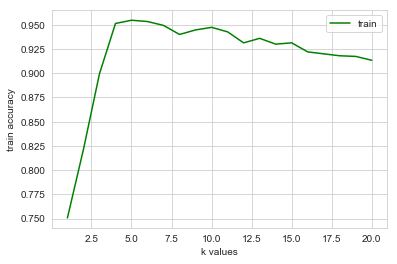

In [95]:
#Now lets select the best features for our model 

from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import f_classif
accuracy_list_train = []
k=np.arange(1,21,1)
for each in k:
    x_new = SelectKBest(f_classif, k=each).fit_transform(X_train, y_train)
    svm.fit(x_new,y_train)
    accuracy_list_train.append(svm.score(x_new,y_train))   
    
plt.plot(k,accuracy_list_train,color="green",label="train")
plt.xlabel("k values")
plt.ylabel("train accuracy")
plt.legend()
plt.show()

#the below graph tells us that we must choose maximum of 4-5 features to get a high train score

In [96]:
# Model with Grid Search CV 
from sklearn.model_selection import GridSearchCV

C=[1,0.1,0.25,0.5,2,0.75]
kernel=["linear","rbf"]
gamma=["auto",0.01,0.001,0.0001,1]
decision_function_shape=["ovo","ovr"]

In [97]:
svm=SVC(random_state=1)
grid_svm=GridSearchCV(estimator=svm,cv=5,param_grid=dict(kernel=kernel,C=C, gamma=gamma, decision_function_shape=decision_function_shape))
grid_svm.fit(X_train,y_train)
print("best score: ", grid_svm.best_score_)
print("best param: ", grid_svm.best_params_)

best score:  0.9466666666666667
best param:  {'C': 2, 'decision_function_shape': 'ovo', 'gamma': 'auto', 'kernel': 'linear'}


In [98]:
# Now lets build the model with the best parameters we have found 

svm_model=SVC(C=2,decision_function_shape="ovo",gamma="auto",kernel="linear",random_state=1)

In [99]:
svm_model.fit(X_train,y_train)

SVC(C=2, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovo', degree=3, gamma='auto', kernel='linear',
  max_iter=-1, probability=False, random_state=1, shrinking=True,
  tol=0.001, verbose=False)

In [100]:
print("train_accuracy:",svm_model.score(X_train,y_train))
print("test_accuracy: ", svm_model.score(X_test,y_test))

train_accuracy: 0.9626666666666667
test_accuracy:  0.952


In [101]:

y_train_pred = svm_model.predict(X_train)
y_test_pred = svm_model.predict(X_test)
print("\nConfusion Matrix:\n%s"%confusion_matrix(y_test_pred,y_test))




Confusion Matrix:
[[122   5   0   0]
 [  2 100   4   0]
 [  0   5 117   4]
 [  0   0   4 137]]


In [102]:
print("\nClassification Report:\n%s"%classification_report(y_test_pred,y_test))


Classification Report:
             precision    recall  f1-score   support

          0       0.98      0.96      0.97       127
          1       0.91      0.94      0.93       106
          2       0.94      0.93      0.93       126
          3       0.97      0.97      0.97       141

avg / total       0.95      0.95      0.95       500



# Conclusion

In [103]:
from prettytable import PrettyTable

    
x = PrettyTable()
x.field_names = ["Model","Train Accuracy", "Test Accuracy"]
x.add_row(["Kneighbors Classifier",0.5833,0.462 ]) 
x.add_row(["Softmax Regression - Mutinomial Regression",0.98266, 0.962])
x.add_row(["Decision Tree Classsifier",0.995, 0.820])
x.add_row(["Support Vector Machine Classifier", 0.9626666666666667, 0.952])
print(x)

+--------------------------------------------+--------------------+---------------+
|                   Model                    |   Train Accuracy   | Test Accuracy |
+--------------------------------------------+--------------------+---------------+
|           Kneighbors Classifier            |       0.5833       |     0.462     |
| Softmax Regression - Mutinomial Regression |      0.98266       |     0.962     |
|         Decision Tree Classsifier          |       0.995        |      0.82     |
|     Support Vector Machine Classifier      | 0.9626666666666667 |     0.952     |
+--------------------------------------------+--------------------+---------------+


We can conclude based the train and test scores as well looking at the confusion matrix that Softmax regression and Support vector machine classifier would work the best. 
For the SVC Classifier : 476 samples has been corrected predicted as to which price range it should belong to.

For Softmax regression classifier : 481 samples has been corrected predicted as to which price range it should belong to.

    Hence our best model is Softmax Regression